# spacy
https://spacy.io/

## 基础

In [1]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:
import os
import spacy.about

default_model_dir = os.path.join(os.path.dirname(spacy.about.__file__), 'models')
print(default_model_dir)

/nas40/chenyu.liu/anaconda3/envs/fastcomposer/lib/python3.11/site-packages/spacy/models


In [15]:
import spacy
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)


Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE


## 为captions.json的名词短语分词

In [115]:
from word2number import w2n
import spacy
import json

nlp = spacy.load('en_core_web_sm')

def text2text(text):
    # 创建一个字符串变量 text，包含待处理的文本：
    # text = 'Three old women and two little girls and two big boys were walking down the street.'
    # 使用 nlp 对文本进行处理，获取命名实体和依存关系：
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    deps = [(token.i, token.text, token.dep_, token.head.text) for token in doc]

    # print("old_text: ", text)
    # print("doc: ", doc)
    # print("entities: ", entities)
    # print("deps: ", deps)

    gender={
        'men': 'man',
        'women': 'woman',
        'boys': 'boy',
        'girls': 'girl',
        'babies': 'baby',
        'children': 'child'
    }

    # 从依存关系中定位到名词短语 Two women：
    OLD=[]
    NEW=[]
    text_list = text.split(' ')
    for i, token, dep, head in deps:
        if dep == 'nummod' and head in list(gender.keys()):
            for t in doc:
                if t.text == head:
                    end = t.i
                    break
            old = ' '.join(text_list[i: end+1])
            new = ' '.join(['a'] + text_list[i+1: end] + [gender[head]])
            # print("old: ", old)
            # print("now: ", new)

            # print("token: ", token)
            token_num = w2n.word_to_num(token)
            # print("new_token: ", token_num)
            news = []
            for i in range(token_num):
                news.append(new)
            news = ' and '.join(news)
            OLD.append(old)
            NEW.append(news)
            # print('\n')

    for i in range(len(OLD)):
        text = text.replace(OLD[i], NEW[i])

    # print("new_text: ", text)
    return text

json_path = '/nas40/chenyu.liu/Datasets/FFHQ/in-the-wild-images/captions_ffhq_.json'
with open(json_path, 'r') as f:
    data = json.load(f)
    
for key, value in data.items():
    data[key] = [value[0], text2text(value[0])]
    print(key, data[key])

with open(json_path, 'w') as f:
    json.dump(data, f)

00000 ['a baby laying on a blue blanket with a blue pillow', 'a baby laying on a blue blanket with a blue pillow']
00001 ['a woman with a big smile and a ring on her finger', 'a woman with a big smile and a ring on her finger']
00002 ['a woman getting a shot in the arm from a nurse', 'a woman getting a shot in the arm from a nurse']
00003 ['a little girl in a white dress with a flower on her head', 'a little girl in a white dress with a flower on her head']
00004 ['a woman in a pink hat and pink dress with a pink apron', 'a woman in a pink hat and pink dress with a pink apron']
00005 ['a man in orange jacket talking on a cell phone in front of a store', 'a man in orange jacket talking on a cell phone in front of a store']
00006 ['a woman with red hair and a red and black striped shirt', 'a woman with red hair and a red and black striped shirt']
00007 ['a group of children wearing aprons pose for a picture', 'a group of children wearing aprons pose for a picture']
00008 ['two women are 

# 测试不同transforms后的图片格式

0——————————————————————————————————————————————————
图像格式: None
图像大小: (937, 1530)
图像模式: RGB
image0:  <PIL.Image.Image image mode=RGB size=937x1530 at 0x7F4D675A9F50>
result0:  tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]) torch.Size([3, 512, 512])


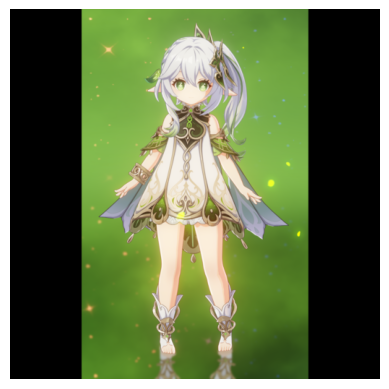

1——————————————————————————————————————————————————
图像格式: None
图像大小: (937, 1530)
图像模式: RGB


xdg-open: no method available for opening '/tmp/tmp9gcm8f6_.PNG'
xdg-open: no method available for opening '/tmp/tmp7tiwvwh_.PNG'
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image1:  <PIL.Image.Image image mode=RGB size=937x1530 at 0x7F4D675A9F50>
result1:  tensor([[[-0.1216, -0.1216, -0.1216,  ..., -0.1137, -0.1137, -0.1216],
         [-0.1216, -0.1216, -0.1216,  ..., -0.1137, -0.1137, -0.1216],
         [-0.1216, -0.1216, -0.1216,  ..., -0.1137, -0.1137, -0.1216],
         ...,
         [-0.3725, -0.3647, -0.3725,  ..., -0.4196, -0.4275, -0.4353],
         [-0.3725, -0.3647, -0.3647,  ..., -0.4196, -0.4275, -0.4353],
         [-0.3647, -0.3647, -0.3725,  ..., -0.4196, -0.4196, -0.4353]],

        [[ 0.3098,  0.3098,  0.3098,  ...,  0.3255,  0.3255,  0.3255],
         [ 0.3098,  0.3098,  0.3098,  ...,  0.3255,  0.3255,  0.3255],
         [ 0.3020,  0.3098,  0.3020,  ...,  0.3255,  0.3255,  0.3255],
         ...,
         [-0.0118, -0.0118, -0.0118,  ..., -0.0588, -0.0588, -0.0588],
         [-0.0118, -0.0118, -0.0039,  ..., -0.0588, -0.0588, -0.0588],
         [-0.0039, -0.0039, -0.0118,  ..., -0.0588, -0.0588, -0.0588]],

        [[-0.4902, -0.4902, -0.4

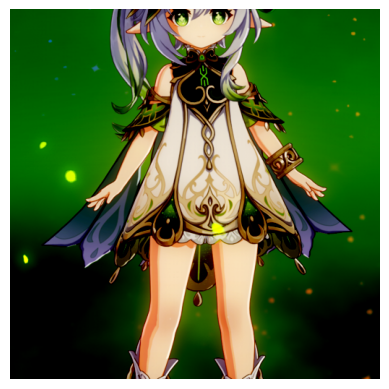

2——————————————————————————————————————————————————
图像格式: None
图像大小: (937, 1530)
图像模式: RGB


xdg-open: no method available for opening '/tmp/tmpou1i84c0.PNG'
xdg-open: no method available for opening '/tmp/tmpvew9nrqi.PNG'
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image2:  <PIL.Image.Image image mode=RGB size=937x1530 at 0x7F4D673A69D0>
result2:  tensor([[[-0.0745, -0.0745, -0.0745,  ..., -0.3569, -0.3569, -0.3569],
         [-0.0745, -0.0667, -0.0745,  ..., -0.3569, -0.3569, -0.3569],
         [-0.0667, -0.0667, -0.0667,  ..., -0.3569, -0.3569, -0.3569],
         ...,
         [-0.3333, -0.3412, -0.3412,  ..., -0.5843, -0.5843, -0.5843],
         [-0.3412, -0.3412, -0.3333,  ..., -0.5843, -0.5843, -0.5843],
         [-0.3333, -0.3333, -0.3333,  ..., -0.5843, -0.5843, -0.5843]],

        [[ 0.3882,  0.3882,  0.3804,  ...,  0.0196,  0.0275,  0.0275],
         [ 0.3882,  0.3882,  0.3882,  ...,  0.0196,  0.0275,  0.0275],
         [ 0.3882,  0.3882,  0.3882,  ...,  0.0196,  0.0196,  0.0196],
         ...,
         [ 0.1137,  0.1059,  0.1137,  ..., -0.2941, -0.2863, -0.2863],
         [ 0.1137,  0.1137,  0.1059,  ..., -0.2941, -0.2863, -0.2863],
         [ 0.1137,  0.1137,  0.1137,  ..., -0.2863, -0.2863, -0.2863]],

        [[-0.4980, -0.4902, -0.4

xdg-open: no method available for opening '/tmp/tmpgop6wwi8.PNG'


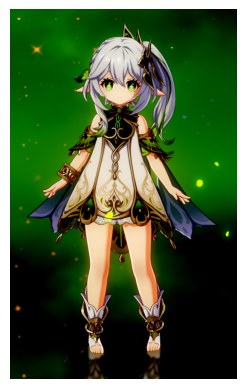

xdg-open: no method available for opening '/tmp/tmp_e068h8q.PNG'


3——————————————————————————————————————————————————
图像格式: None
图像大小: (937, 1530)
图像模式: RGB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image3:  <PIL.Image.Image image mode=RGB size=937x1530 at 0x7F4D673CDE50>
result3:  tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]]) torch.Size([3, 512, 51

xdg-open: no method available for opening '/tmp/tmpq_z0bc_f.PNG'


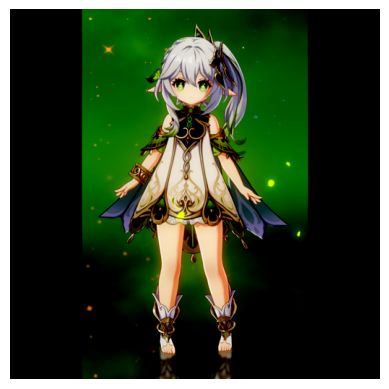

4——————————————————————————————————————————————————


xdg-open: no method available for opening '/tmp/tmp05hrb7px.PNG'


图像格式: None
图像大小: (937, 1530)
图像模式: RGB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image4:  <PIL.Image.Image image mode=RGB size=937x1530 at 0x7F4D67391F10>
result4:  tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]]) torch.Size([3, 512, 51

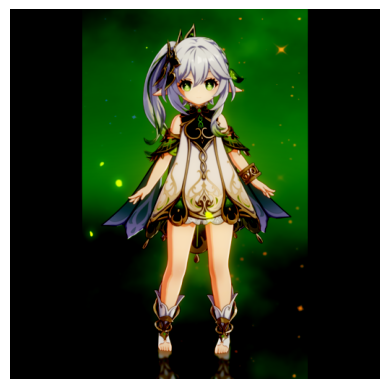

——————————————————————————————————————————————————


xdg-open: no method available for opening '/tmp/tmph8sgd_1y.PNG'
xdg-open: no method available for opening '/tmp/tmp93bsrt7s.PNG'


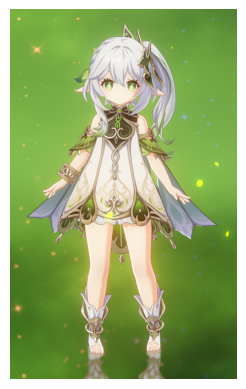

In [33]:
import torch
from torchvision import transforms
from torchvision.transforms import ToPILImage
from PIL import Image
from collections import OrderedDict
from torch import nn
import matplotlib.pyplot as plt


class PadToSquare(torch.nn.Module):
    def __init__(self, fill=0, padding_mode="constant"):
        super().__init__()
        self.fill = fill
        self.padding_mode = padding_mode

    def forward(self, image: torch.Tensor):
        _, h, w = image.shape
        if h == w:
            return image
        elif h > w:
            padding = (h - w) // 2
            image = torch.nn.functional.pad(
                image,
                (padding, padding, 0, 0),
                self.padding_mode,
                self.fill,
            )
        else:
            padding = (w - h) // 2
            image = torch.nn.functional.pad(
                image,
                (0, 0, padding, padding),
                self.padding_mode,
                self.fill,
            )
        return image



resolution = 512
center_crop = True
random_flip = True


# 自定义模块类
class ToTensorModule(nn.Module):
    def __init__(self):
        super(ToTensorModule, self).__init__()

    def forward(self, x):
        return transforms.ToTensor()(x)
train_transforms0 = torch.nn.Sequential(
    OrderedDict(
        [
            # *pre_augmentations,
            ("ToTensor", ToTensorModule()), # ("ToTensor", transforms.ToTensor()),
            ("pad_to_square", PadToSquare(fill=0, padding_mode="constant")),
            (
                "resize",
                transforms.Resize(
                    (resolution, resolution),
                    interpolation=transforms.InterpolationMode.BILINEAR,
                    antialias=True,
                ),
            ),
            # *augmentations,
            ("convert_to_float", transforms.ConvertImageDtype(torch.float32)),
        ]
    )
)

train_transforms1 = transforms.Compose(
    [
        transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(resolution) if center_crop else transforms.RandomCrop(resolution),
        transforms.RandomHorizontalFlip() if random_flip else transforms.Lambda(lambda x: x),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

train_transforms2 = transforms.Compose(
    [
        transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR),
        # transforms.CenterCrop(resolution) if center_crop else transforms.RandomCrop(resolution),
        # transforms.RandomHorizontalFlip() if random_flip else transforms.Lambda(lambda x: x),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

pad_to_square = PadToSquare(fill=0, padding_mode="constant")
train_transforms3 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Lambda(pad_to_square),
        transforms.ToPILImage(),
        transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR),
        # transforms.CenterCrop(resolution) if center_crop else transforms.RandomCrop(resolution),
        # transforms.RandomHorizontalFlip() if random_flip else transforms.Lambda(lambda x: x),
        transforms.ToTensor(),
        # transforms.ConvertImageDtype(torch.float32),
        transforms.Normalize([0.5], [0.5]),
    ]
)


class CenterCropOrPadSides(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, image: torch.Tensor):
        _, h, w = image.shape
        if h > w:
            # pad sides with black
            padding = (h - w) // 2
            image = torch.nn.functional.pad(
                image,
                (padding, padding, 0, 0),
                "constant",
                0,
            )
            # resize to square
            image = transforms.functional.resize(
                image,
                (w, w),
                interpolation=transforms.InterpolationMode.BILINEAR,
                antialias=True,
            )
        else:
            # center crop to square
            padding = (w - h) // 2
            image = image[:, :, padding : padding + h]
        return image
def get_train_transforms():
    train_transforms = torch.nn.Sequential(
        transforms.Resize(
            512,
            interpolation=transforms.InterpolationMode.BILINEAR,
            antialias=True,
        ),
        transforms.RandomHorizontalFlip(),
        CenterCropOrPadSides(),
        transforms.ConvertImageDtype(torch.float32),
        transforms.Normalize([0.5], [0.5]),
    )
    return train_transforms
train_transforms4 = get_train_transforms()




print("0——————————————————————————————————————————————————")

# image = Image.open('/nas40/chenyu.liu/fastcomposer/data/other/Elsa/0.jpeg')
image = Image.open('/nas40/chenyu.liu/0.png')
image = image.convert("RGB")

# 显示图像信息
print("图像格式:", image.format)
print("图像大小:", image.size)
print("图像模式:", image.mode)
# 显示图像
image.show()

print("image0: ", image)
result0 = train_transforms0(image)
print("result0: ", result0, result0.shape)
to_pil = ToPILImage()
image_pil = to_pil(result0)
# 显示图像
image_pil.show()
# 将图像张量转换为NumPy数组
image_np = result0.numpy()

# 转换通道顺序，从 (channels, height, width) 到 (height, width, channels)
image_np = image_np.transpose(1, 2, 0)

# 显示图像
plt.imshow(image_np)
plt.axis('off')
plt.show()


print("1——————————————————————————————————————————————————")

# image = Image.open('/nas40/chenyu.liu/fastcomposer/data/other/Elsa/0.jpeg')
image = Image.open('/nas40/chenyu.liu/0.png')
image = image.convert("RGB")

# 显示图像信息
print("图像格式:", image.format)
print("图像大小:", image.size)
print("图像模式:", image.mode)
# 显示图像
image.show()

print("image1: ", image)
result1 = train_transforms1(image)
print("result1: ", result1, result1.shape)
to_pil = ToPILImage()
image_pil = to_pil(result1)
# 显示图像
image_pil.show()
# 将图像张量转换为NumPy数组
image_np = result1.numpy()

# 转换通道顺序，从 (channels, height, width) 到 (height, width, channels)
image_np = image_np.transpose(1, 2, 0)

# 显示图像
plt.imshow(image_np)
plt.axis('off')
plt.show()

print("2——————————————————————————————————————————————————")

# image = Image.open('/nas40/chenyu.liu/fastcomposer/data/other/Elsa/0.jpeg')
image = Image.open('/nas40/chenyu.liu/0.png')
image = image.convert("RGB")

# 显示图像信息
print("图像格式:", image.format)
print("图像大小:", image.size)
print("图像模式:", image.mode)
# 显示图像
image.show()

print("image2: ", image)
result2 = train_transforms2(image)
print("result2: ", result2, result2.shape)
to_pil = ToPILImage()
image_pil = to_pil(result2)
# 显示图像
image_pil.show()
# 将图像张量转换为NumPy数组
image_np = result2.numpy()

# 转换通道顺序，从 (channels, height, width) 到 (height, width, channels)
image_np = image_np.transpose(1, 2, 0)

# 显示图像
plt.imshow(image_np)
plt.axis('off')
plt.show()

print("3——————————————————————————————————————————————————")

# image = Image.open('/nas40/chenyu.liu/fastcomposer/data/other/Elsa/0.jpeg')
image = Image.open('/nas40/chenyu.liu/0.png')
image = image.convert("RGB")

# 显示图像信息
print("图像格式:", image.format)
print("图像大小:", image.size)
print("图像模式:", image.mode)
# 显示图像
image.show()

print("image3: ", image)
result3 = train_transforms3(image)
print("result3: ", result3, result3.shape)
to_pil = ToPILImage()
image_pil = to_pil(result3)
# 显示图像
image_pil.show()
# 将图像张量转换为NumPy数组
image_np = result3.numpy()

# 转换通道顺序，从 (channels, height, width) 到 (height, width, channels)
image_np = image_np.transpose(1, 2, 0)

# 显示图像
plt.imshow(image_np)
plt.axis('off')
plt.show()

print("4——————————————————————————————————————————————————")

# image = Image.open('/nas40/chenyu.liu/fastcomposer/data/other/Elsa/0.jpeg')
image = Image.open('/nas40/chenyu.liu/0.png')
image = image.convert("RGB")

# 显示图像信息
print("图像格式:", image.format)
print("图像大小:", image.size)
print("图像模式:", image.mode)
# 显示图像
image.show()

print("image4: ", image)

# 再转换之前 需要加上transforms.ToTensor()
transform = transforms.ToTensor()
image = transform(image)

result4 = train_transforms4(image)
print("result4: ", result4, result4.shape)
to_pil = ToPILImage()
image_pil = to_pil(result4)
# 显示图像
image_pil.show()
# 将图像张量转换为NumPy数组
image_np = result4.numpy()

# 转换通道顺序，从 (channels, height, width) 到 (height, width, channels)
image_np = image_np.transpose(1, 2, 0)

# 显示图像
plt.imshow(image_np)
plt.axis('off')
plt.show()

print("——————————————————————————————————————————————————")


import matplotlib.pyplot as plt
import imageio


# 读取图像文件
# image = imageio.imread('/nas40/chenyu.liu/fastcomposer/data/other/Elsa/0.jpeg')
image = Image.open('/nas40/chenyu.liu/0.png')
# 显示图像
plt.imshow(image)
plt.axis('off')
plt.show()

# Genshin数据处理

## 准备数据
从Genshin的前get_role_num个角色中，分别提取num_per_role张图片（默认就1张吧），重新命名为“[name]_[i]”（默认就"[name]"吧），存放到新建的train_fastcomposer_genshin_文件夹中

In [13]:
import os
import shutil

get_role_num = 64
num_per_role = 1

orig_genshin_root_dir="/nas40/chenyu.liu/Datasets/Genshin/"
target_genshin_root_dir="/nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_genshin_"
if not os.path.exists(target_genshin_root_dir):
    os.makedirs(target_genshin_root_dir, exist_ok=True)

role_names = os.listdir(orig_genshin_root_dir)
role_names = [x for x in role_names if x not in ['.DS_Store', '.ipynb_checkpoints']]
role_names.sort()
print("len(role_names): ", len(role_names))
# print("role_names: ", role_names)
for role_name in role_names[:get_role_num]:
    role_dir = os.path.join(orig_genshin_root_dir, role_name, "orig")
    role_pics = os.listdir(role_dir)
    role_pics = [x for x in role_pics if x not in ['.DS_Store', '.ipynb_checkpoints']]
    role_pics.sort()
    # print("role_pics: ", role_pics)
    for i, role_pic in enumerate(role_pics[:num_per_role]):
        role_pic_dir = os.path.join(role_dir, role_pic)
        # 复制该图片
        shutil.copy(role_pic_dir, os.path.join(target_genshin_root_dir, role_name + '_' + str(i) + '.png'))

len(role_names):  64


## 生成metadata.jsonl文件
然后train_fastcomposer_genshin_文件夹下新建metadata.jsonl文件，内容格式如下：

{"file_name": "00000.png", "text": "a baby laying on a blue blanket with a blue pillow", "image_name": "00000", "image_text": "a baby <|image|> laying on a blue blanket with a blue pillow"}

{"file_name": "00001.png", "text": "a woman with a big smile and a ring on her finger", "image_name": "00001", "image_text": "a woman <|image|> with a big smile and a ring on her finger"}

{"file_name": "00002.png", "text": "a woman getting a shot in the arm from a nurse", "image_name": "00002", "image_text": "a woman <|image|> getting a shot in the arm from a nurse <|image|>"}

In [14]:
import os
import json

# metadata = [
#     {"file_name": "00000.png", "text": "a baby laying on a blue blanket with a blue pillow", "image_name": "00000", "image_text": "a baby <|image|> laying on a blue blanket with a blue pillow"},
#     {"file_name": "00001.png", "text": "a woman with a big smile and a ring on her finger", "image_name": "00001", "image_text": "a woman <|image|> with a big smile and a ring on her finger"},
#     {"file_name": "00002.png", "text": "a woman getting a shot in the arm from a nurse", "image_name": "00002", "image_text": "a woman <|image|> getting a shot in the arm from a nurse <|image|>"}
# ]

metadata = []
genshin_boy_list = ['Albedo', 'AratakiItto', 'Bennett', 'Chongyun', 'Cyno', 'Diluc', 'Gorou', 'KaedeharaKazuha', 'Kaeya', 'KamizatoAyato', 'Kaveh', 'Mika', 'Razor', 'ShikanoinHeizou', 'Tartaglia', 'Thoma', 'Tighnari', 'Venti', 'Wanderer', 'Xiao', 'Xingqiu', 'Zhongli']
unique_token = "<|image|>"

role_pics = os.listdir(target_genshin_root_dir)
role_pics = [x for x in role_pics if x not in ['.DS_Store', '.ipynb_checkpoints', 'metadata.jsonl']]
role_pics.sort()
for role_pic in role_pics:
    role_info = {}
    role_info["file_name"] = role_pic
    gender = 'boy' if role_pic.split('_')[0] in genshin_boy_list else 'girl'
    role_info["text"] = ' '.join(['a', gender, 'is standing'])
    role_info["image_name"] = role_pic.split('.')[0]
    role_info["image_text"] = ' '.join(['a', gender, unique_token, 'is standing'])
    # print('role_info: ', role_info)
    metadata.append(role_info)

with open(os.path.join(target_genshin_root_dir, "metadata.jsonl"), "w") as f:
    for item in metadata:
        json.dump(item, f)
        f.write('\n')

role_info:  {'file_name': 'Albedo_0.png', 'text': 'a boy is standing', 'image_name': 'Albedo_0', 'image_text': 'a boy <|image|> is standing'}
role_info:  {'file_name': 'Aloy_0.png', 'text': 'a girl is standing', 'image_name': 'Aloy_0', 'image_text': 'a girl <|image|> is standing'}
role_info:  {'file_name': 'Amber_0.png', 'text': 'a girl is standing', 'image_name': 'Amber_0', 'image_text': 'a girl <|image|> is standing'}
role_info:  {'file_name': 'AratakiItto_0.png', 'text': 'a boy is standing', 'image_name': 'AratakiItto_0', 'image_text': 'a boy <|image|> is standing'}
role_info:  {'file_name': 'Barbara_0.png', 'text': 'a girl is standing', 'image_name': 'Barbara_0', 'image_text': 'a girl <|image|> is standing'}
role_info:  {'file_name': 'Beidou_0.png', 'text': 'a girl is standing', 'image_name': 'Beidou_0', 'image_text': 'a girl <|image|> is standing'}
role_info:  {'file_name': 'Bennett_0.png', 'text': 'a boy is standing', 'image_name': 'Bennett_0', 'image_text': 'a boy <|image|> is s

## 新建train_genshin_mask_文件夹

In [15]:
target_genshin_mask_root_dir = target_genshin_root_dir + "mask_"
if not os.path.exists(target_genshin_mask_root_dir):
    os.makedirs(target_genshin_mask_root_dir, exist_ok=True)


## 生成mask相关图片

In [16]:
import onnxruntime as rt
import numpy as np
import cv2


def get_mask(img, s=1024):
    img = (img / 255).astype(np.float32)
    h, w = h0, w0 = img.shape[:-1]
    h, w = (s, int(s * w / h)) if h > w else (int(s * h / w), s)
    ph, pw = s - h, s - w
    img_input = np.zeros([s, s, 3], dtype=np.float32)
    img_input[ph // 2:ph // 2 + h, pw // 2:pw // 2 + w] = cv2.resize(img, (w, h))
    img_input = np.transpose(img_input, (2, 0, 1))
    img_input = img_input[np.newaxis, :]
    mask = rmbg_model.run(None, {'img': img_input})[0][0]
    mask = np.transpose(mask, (1, 2, 0))
    mask = mask[ph // 2:ph // 2 + h, pw // 2:pw // 2 + w]
    mask = cv2.resize(mask, (w0, h0))[:, :, np.newaxis]
    return mask


def rmbg_fn(img):
    mask = get_mask(img)
    # img = (mask * img + 255 * (1 - mask)).astype(np.uint8)
    img = (mask * img).astype(np.uint8)
    mask = (mask * 255).astype(np.uint8)
    img = np.concatenate([img, mask], axis=2, dtype=np.uint8)
    mask = mask.repeat(3, axis=2)
    return mask, img




if __name__ == "__main__":
    providers = ['CUDAExecutionProvider', 'CPUExecutionProvider']
    ##
    model_path = "extract_mask/isnetis.onnx"
    # model_path = "model_ckpt/isnetis.onnx"
    rmbg_model = rt.InferenceSession(model_path, providers=providers)
    for i, role_pic in enumerate(role_pics):
        print(f"{i}/{len(role_pics)}")
        id = 1 #表示这张图片中的第id个人
        input_img = cv2.imread(os.path.join(target_genshin_root_dir, role_pic))
        output_mask, output_img = rmbg_fn(input_img)
        role_pic_name = role_pic.split('.')[0]
        
        seg_mask_dir = os.path.join(target_genshin_mask_root_dir, role_pic_name, role_pic_name+'_seg_mask', role_pic_name+'_'+str(id))
        print("seg_mask_dir: ", seg_mask_dir)
        if not os.path.exists(seg_mask_dir):
            os.makedirs(seg_mask_dir, exist_ok=True)
        cv2.imwrite(os.path.join(seg_mask_dir, role_pic_name+'_'+str(id)+'.png'), output_mask)
        
        sub_seg_dir = os.path.join(target_genshin_mask_root_dir, role_pic_name, role_pic_name+'_sub_seg', role_pic_name+'_'+str(id))
        print("sub_seg_dir: ", sub_seg_dir)
        if not os.path.exists(sub_seg_dir):
            os.makedirs(sub_seg_dir, exist_ok=True)
        cv2.imwrite(os.path.join(sub_seg_dir, role_pic_name+'_'+str(id)+'.png'), output_img)
    

0/64
seg_mask_dir:  /nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_genshin_mask_/Albedo_0/Albedo_0_seg_mask/Albedo_0_1
sub_seg_dir:  /nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_genshin_mask_/Albedo_0/Albedo_0_sub_seg/Albedo_0_1
1/64
seg_mask_dir:  /nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_genshin_mask_/Aloy_0/Aloy_0_seg_mask/Aloy_0_1
sub_seg_dir:  /nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_genshin_mask_/Aloy_0/Aloy_0_sub_seg/Aloy_0_1
2/64
seg_mask_dir:  /nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_genshin_mask_/Amber_0/Amber_0_seg_mask/Amber_0_1
sub_seg_dir:  /nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_genshin_mask_/Amber_0/Amber_0_sub_seg/Amber_0_1
3/64
seg_mask_dir:  /nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_genshin_mask_/AratakiItto_0/AratakiItto_0_seg_mask/AratakiItto_0_1
sub_seg_dir:  /nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_ge

# instantbooth/data_336k_pre数据处理（for mine）

## 准备数据
把所有形如xxxxxxx.jpg的文件复制到新建的train_fastcomposer_data_336k_pre_文件夹下

In [1]:
import os
import shutil
from tqdm import tqdm

orig_data_336k_pre_root_dir="/nas40/chenyu.liu/Datasets/instantbooth/data_336k_pre"
target_data_336k_pre_root_dir="/nas40/chenyu.liu/fastcomposer/fastcomposer/train_fastcomposer_data_336k_pre_"
if not os.path.exists(target_data_336k_pre_root_dir):
    os.makedirs(target_data_336k_pre_root_dir, exist_ok=True)

role_names = os.listdir(orig_data_336k_pre_root_dir)
role_names = [x for x in role_names if x not in ['.DS_Store', '.ipynb_checkpoints']]
role_names.sort()
print("len(role_names): ", len(role_names))

for i, role_name in tqdm(enumerate(role_names)):
    if 'mask' not in role_name:
        role_pic_dir = os.path.join(orig_data_336k_pre_root_dir, role_name)
        target_dir = os.path.join(target_data_336k_pre_root_dir, role_name.split('.')[0] + '.png')
        shutil.copy(role_pic_dir, target_dir)


len(role_names):  1009950


1009950it [41:28, 405.83it/s]


## 生成metadata.jsonl文件
然后train_fastcomposer_data_336k_pre_文件夹下新建metadata.jsonl文件：读取data_336k.csv文件的每一行，在"image_path_v3"列中获取每个图像名称，并根据"tags"列获取每个图片的gender, e.g., "boy" or "girl"，内容格式如下：

{"file_name": "6013890.png", "text": "a girl", "image_name": "6013890", "image_text": "a girl <|image|>"}

{"file_name": "6013901.png", "text": "a girl", "image_name": "6013901", "image_text": "a girl <|image|>"}


In [2]:
import csv
image_list = []
with open('/nas40/chenyu.liu/Datasets/instantbooth/data_336k.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # 跳过第一行
    for row in tqdm(reader):
        # print(row)
        image_name = row[3].split('/')[-1].replace('jpg', 'png') # 'image_path_v3'列
        gender = 'boy' if '1boy' in row[0] else 'girl' # 'tags'列
        image_list.append([image_name, gender]) # ['00000', 'boy']
        
sorted_image_list = sorted(image_list[0:], key=lambda x: x[0])
print('len(sorted_image_list): ', len(sorted_image_list))


import os
import json

# metadata = [
#     {"file_name": "00000.png", "text": "a baby laying on a blue blanket with a blue pillow", "image_name": "00000", "image_text": "a baby <|image|> laying on a blue blanket with a blue pillow"},
#     {"file_name": "00001.png", "text": "a woman with a big smile and a ring on her finger", "image_name": "00001", "image_text": "a woman <|image|> with a big smile and a ring on her finger"},
#     {"file_name": "00002.png", "text": "a woman getting a shot in the arm from a nurse", "image_name": "00002", "image_text": "a woman <|image|> getting a shot in the arm from a nurse <|image|>"}
# ]

metadata = []
# genshin_boy_list = ['Albedo', 'AratakiItto', 'Bennett', 'Chongyun', 'Cyno', 'Diluc', 'Gorou', 'KaedeharaKazuha', 'Kaeya', 'KamizatoAyato', 'Kaveh', 'Mika', 'Razor', 'ShikanoinHeizou', 'Tartaglia', 'Thoma', 'Tighnari', 'Venti', 'Wanderer', 'Xiao', 'Xingqiu', 'Zhongli']
unique_token = "<|image|>"

for role_pic in tqdm(sorted_image_list):
    role_info = {}
    role_info["file_name"] = role_pic[0]
    role_info["text"] = ' '.join(['a', role_pic[1]])
    role_info["image_name"] = role_pic[0].split('.')[0]
    role_info["image_text"] = ' '.join(['a', role_pic[1], unique_token])
    metadata.append(role_info)

with open(os.path.join(target_data_336k_pre_root_dir, "metadata.jsonl"), "w") as f:
    for item in tqdm(metadata):
        json.dump(item, f)
        f.write('\n')


336650it [00:01, 237171.71it/s]
100%|█| 336650/336650 [00:00<00:00, 1531
100%|█| 336650/336650 [00:01<00:00, 1703


## 新建train_fastcomposer_data_336k_pre_mask_文件夹

In [3]:
target_data_336k_pre_mask_root_dir = target_data_336k_pre_root_dir + "mask_"
if not os.path.exists(target_data_336k_pre_mask_root_dir):
    os.makedirs(target_data_336k_pre_mask_root_dir, exist_ok=True)

## 生成mask相关图片
实际上，instantbooth/data_336k_pre文件夹下已经有这些图片了，所以不需要再重新生成，只需要新建相应的文件夹，并复制过去就行了

In [4]:
role_pics = [i[0] for i in sorted_image_list]
# print('role_pics: ', role_pics)

for i, role_pic in tqdm(enumerate(role_pics)):
    # print(f"{i}/{len(role_pics)}")
    # id = 1 #表示这张图片中的第id个人
    # input_img = cv2.imread(os.path.join(target_data_336k_pre_root_dir, role_pic))
    # output_mask, output_img = rmbg_fn(input_img)
    role_pic_name = role_pic.split('.')[0]
    
    seg_mask_dir = os.path.join(target_data_336k_pre_mask_root_dir, role_pic_name, role_pic_name+'_seg_mask', role_pic_name)
    if not os.path.exists(seg_mask_dir):
        os.makedirs(seg_mask_dir, exist_ok=True)
    shutil.copy(os.path.join(orig_data_336k_pre_root_dir, role_pic_name+'_mask.jpg'), os.path.join(seg_mask_dir, role_pic_name+'.png'))
    
    sub_seg_dir = os.path.join(target_data_336k_pre_mask_root_dir, role_pic_name, role_pic_name+'_sub_seg', role_pic_name)
    if not os.path.exists(sub_seg_dir):
        os.makedirs(sub_seg_dir, exist_ok=True)
    shutil.copy(os.path.join(orig_data_336k_pre_root_dir, role_pic_name+'_img_with_mask.jpg'), os.path.join(sub_seg_dir, role_pic_name+'.png'))


336650it [4:09:18, 22.51it/s]


# instantbooth/data_336k_pre数据处理（for release）

## 准备数据
把所有形如xxxxxxx.jpg的文件复制到新建的train_fastcomposer_data_336k_pre_release_danbooru_文件夹下

In [1]:
import os
import shutil
from tqdm import tqdm

orig_data_336k_pre_root_dir="/nas40/chenyu.liu/Datasets/instantbooth/data_336k_pre"
target_data_336k_pre_root_dir="/nas40/chenyu.liu/fastcomposer_release_danbooru/fastcomposer-main/data/train_fastcomposer_data_336k_pre_release_danbooru_"
chunk_id = '00000'
if not os.path.exists(target_data_336k_pre_root_dir + '/' + chunk_id):
    os.makedirs(target_data_336k_pre_root_dir + '/' + chunk_id, exist_ok=True)

role_names = os.listdir(orig_data_336k_pre_root_dir)
role_names = [x for x in role_names if x not in ['.DS_Store', '.ipynb_checkpoints']]
role_names.sort()
print("len(role_names): ", len(role_names))

# for i, role_name in tqdm(enumerate(role_names)):
#     if 'mask' not in role_name:
#         role_pic_dir = os.path.join(orig_data_336k_pre_root_dir, role_name)
#         target_dir = os.path.join(target_data_336k_pre_root_dir, chunk_id, role_name) #.split('.')[0] + '.png'
#         shutil.copy(role_pic_dir, target_dir)


len(role_names):  1009950


## 生成xxxxxxx.json文件
然后train_fastcomposer_data_336k_pre_release_danbooru_文件夹下为每个xxxxxxx.png文件生成对应的xxxxxxx.json文件：读取data_336k.csv文件的每一行，在"image_path_v3"列中获取每个图像名称，并根据"tags"列获取每个图片的gender, e.g., "boy" or "girl"，内容格式如下：

原：

{"file_name": "6013890.png", "text": "a girl", "image_name": "6013890", "image_text": "a girl <|image|>"}

{"file_name": "6013901.png", "text": "a girl", "image_name": "6013901", "image_text": "a girl <|image|>"}

现：

{"image_id": "6013890", "caption": "a girl", "segments": [{"id": 1, "word": "a girl", "start": 0, "end": 6, "bbox": [13, 39, 681, 511], "coco_label": "person"}]}

{"image_id": "6013901", "caption": "a girl", "segments": [{"id": 1, "word": "a girl", "start": 0, "end": 6, "bbox": [13, 39, 681, 511], "coco_label": "person"}]}

In [2]:
# 生成mask的bbox坐标
import cv2

# 该方法的bbox输出有错，不调用该方法
def mask2bbox(mask_path):
    # 读取掩码图片
    mask_img = cv2.imread(mask_path, 0)  # 灰度模式读取，通道值为0
    # 二值化处理
    _, thresh = cv2.threshold(mask_img, 1, 255, cv2.THRESH_BINARY)
    # 轮廓检测
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # 获取边界框坐标
    if len(contours) > 0:
        contour = contours[0]
        x, y, w, h = cv2.boundingRect(contour)
        bbox = [x, y, x+w, y+h]  # 边界框的左上角和右下角坐标
    else:
        bbox = []
    return bbox

# mask_path = "/nas40/chenyu.liu/Datasets/instantbooth/data_1k_pre/6003622_mask.jpg"
#             # "/nas40/chenyu.liu/Datasets/instantbooth/data_1k_pre/6003095_mask.jpg"
# bbox = mask2bbox(mask_path)
# print("掩码图片的边界框坐标：", bbox)


import csv
image_list = []
with open('/nas40/chenyu.liu/Datasets/instantbooth/data_336k.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # 跳过第一行
    for row in tqdm(reader):
        # print(row)
        image_name = row[3].split('/')[-1].replace('.jpg', '') # 'image_path_v3'列; 'png'
        gender = 'boy' if '1boy' in row[0] else 'girl' # 'tags'列
        image_list.append([image_name, gender]) # ['00000', 'boy']
        
sorted_image_list = sorted(image_list[0:], key=lambda x: x[0])
print('len(sorted_image_list): ', len(sorted_image_list))


import os
import json
from PIL import Image

# metadata = [
#     {"file_name": "00000.png", "text": "a baby laying on a blue blanket with a blue pillow", "image_name": "00000", "image_text": "a baby <|image|> laying on a blue blanket with a blue pillow"},
#     {"file_name": "00001.png", "text": "a woman with a big smile and a ring on her finger", "image_name": "00001", "image_text": "a woman <|image|> with a big smile and a ring on her finger"},
#     {"file_name": "00002.png", "text": "a woman getting a shot in the arm from a nurse", "image_name": "00002", "image_text": "a woman <|image|> getting a shot in the arm from a nurse <|image|>"}
# ]

# metadata = []
# genshin_boy_list = ['Albedo', 'AratakiItto', 'Bennett', 'Chongyun', 'Cyno', 'Diluc', 'Gorou', 'KaedeharaKazuha', 'Kaeya', 'KamizatoAyato', 'Kaveh', 'Mika', 'Razor', 'ShikanoinHeizou', 'Tartaglia', 'Thoma', 'Tighnari', 'Venti', 'Wanderer', 'Xiao', 'Xingqiu', 'Zhongli']
# unique_token = "<|image|>"

for role_pic in tqdm(sorted_image_list): #[:2]
    role_info = {}
    role_info["image_id"] = role_pic[0]
    role_info["caption"] = ' '.join(['a', role_pic[1]])
    with Image.open(f"{target_data_336k_pre_root_dir}/{chunk_id}/{role_info['image_id']}.jpg") as img:
        width, height = img.size
    role_info["segments"] = [{"id": 1, "word": role_info["caption"], "start": 0, "end": len(role_info["caption"]), "bbox": [0, 0, width, height], "coco_label": "person"}]

    # print('role_info: ', role_info)

    with open(f"{target_data_336k_pre_root_dir}/{chunk_id}/{role_info['image_id']}.json", "w") as f:
        json.dump(role_info, f)
        f.write('\n')


336650it [00:01, 229576.97it/s]


len(sorted_image_list):  336650


100%|██████████| 336650/336650 [2:01:33<00:00, 46.16it/s]   


## 生成xxxxxxx_danbooru_tags.json文件
新生成json文件，修改“caption”，将原本的“a boy”改成原始danbooru中的tags，segments中的相关部分也要做修改，命名为xxxxxxx_danbooru_tags.json，保存到“00000”下。（注意：不要覆盖原来的xxxxxxx.json）

In [7]:
import cv2
import csv

image_list = []
with open('/nas40/chenyu.liu/Datasets/instantbooth/data_336k.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # 跳过第一行
    for row in tqdm(reader):
        # print(row)
        image_name = row[3].split('/')[-1].replace('.jpg', '') # 'image_path_v3'列; 'png'

        ##
        # gender = 'boy' if '1boy' in row[0] else 'girl' # 'tags'列
        # Determine the values of word and caption
        caption = row[0]
        word = ''
        if '1boy' in caption:
            word = 'a boy'
            caption = caption.replace('1boy', word)
        elif '1girl' in caption:
            word = 'a girl'
            caption = caption.replace('1girl', word)
        else:
            word = 'a girl'
            caption = word + ', ' + caption
        
        ##
        # Compute the start and end of word in caption
        if 'a boy' in caption:
            substring = 'a boy'
            start = caption.find(substring)
            if start != -1:
                end = start + len(substring)
            else:
                print('absolutely impossible:', row[3], caption)
        else: # 'a girl' in caption:
            substring = 'a girl'
            start = caption.find(substring)
            if start != -1:
                end = start + len(substring)
            else:
                print('absolutely impossible:', row[3], caption)

        image_list.append([image_name, caption, word, start, end])
        
sorted_image_list = sorted(image_list[0:], key=lambda x: x[0])
print('len(sorted_image_list): ', len(sorted_image_list))


import os
import json
from PIL import Image

for role_pic in tqdm(sorted_image_list): #[:2]
    role_info = {}
    role_info["image_id"] = role_pic[0]
    role_info["caption"] = role_pic[1] # ' '.join(['a', role_pic[1]])
    ##
    word = role_pic[2]
    start = role_pic[3]
    end = role_pic[4]

    with Image.open(f"{target_data_336k_pre_root_dir}/{chunk_id}/{role_info['image_id']}.jpg") as img:
        width, height = img.size

    role_info["segments"] = [{"id": 1, "word": word, "start": start, "end": end, "bbox": [0, 0, width, height], "coco_label": "person"}]

    # print('role_info: ', role_info)

    with open(f"{target_data_336k_pre_root_dir}/{chunk_id}/{role_info['image_id']}_danbooru_tags.json", "w") as f:
        json.dump(role_info, f)
        f.write('\n')


336650it [00:01, 198237.64it/s]


len(sorted_image_list):  336650


  0%|          | 28/336650 [00:00<20:39, 271.64it/s]

100%|██████████| 336650/336650 [21:32<00:00, 260.41it/s]


## 生成xxxxxxx_blip2_captions.json文件
新生成json文件，修改“caption”，将原本的“a boy”改成blip2生成的captions里的特定词，segments中的相关部分也要做修改，命名为xxxxxxx_blip2_captions.json，保存到“00000”下。（注意：不要覆盖原来的xxxxxxx.json）

/nas40/chenyu.liu/Datasets/instantbooth/blip2_captions_danbooru_336k_.json示例如下：

{
    "1019085": [
        "a girl with blue hair holding a sword in a pile of rocks"
    ],
    "1019091": [
        "a man in armor holding a sword with blood splattered on it"
    ],
}

In [ ]:
# 0. 先读取root_path下的jpg的dir_or_files，生成blip2_captions.txt，防止每次都要从文件夹中重新读取的慢性和不稳定性
root_path = "/nas40/chenyu.liu/fastcomposer_release_danbooru/fastcomposer-main/data/train_fastcomposer_data_336k_pre_release_danbooru_/00000"
dir_or_files = os.listdir(root_path)
print('len(dir_or_files):', len(dir_or_files))
dir_or_files = [x for x in dir_or_files if x not in [".ipynb_checkpoints", ".DS_Store"] and '.jpg' in x]
dir_or_files = sorted(dir_or_files)
with open('/nas40/chenyu.liu/BLIP2/blip2_captions.txt', 'w') as file:
    for item in dir_or_files:
        file.write(item + '\n')

In [ ]:
# 1. 然后运行/nas40/chenyu.liu/BLIP2/generate_blip2_captions_danbooru_batch.py，生成/nas40/chenyu.liu/Datasets/instantbooth/blip2_captions_danbooru_336k_batch__.json，然后将json文件中的' }{'替换为','，从命名为blip2_captions_danbooru_336k_batch_.json

In [9]:
# 2. 根据blip2_captions_danbooru_336k_batch_.json文件，生成每个图片的json文件到数据集的文件夹下
import cv2
import csv
import json

image_list = []
num_no_a = 0
num_no_gender =0
with open('/nas40/chenyu.liu/Datasets/instantbooth/blip2_captions_danbooru_336k_batch_.json', 'r') as f:
    data = json.load(f)
    for key, value in data.items():
        # get image_name
        image_name = key
        
        # get caption
        caption = value[0]

        # get word
        caption_list = caption.split()
        sub_str = None
        gender_list = ['girl', 'boy', 'woman', 'man', 'female', 'male', 'character', 'child', 'person', 'bride', 'couple', 'guy', 'robot', 'chef', 'maid', 'witch', 'mermaid', 'princess', 'fairy', 'angel', 'cat', 'dog', 'bird', 'rabbit', 'mouse', 'panda', 'zombie']
        for gender in gender_list:
            if gender in caption_list:
                start_index = caption_list.index(gender)
                end_index = None
                for i in range(start_index-1, -1, -1):
                    if caption_list[i] in ['a', 'an']:
                        end_index = i
                        break
                if end_index != None:
                    sub_str = " ".join(caption_list[end_index:start_index+1])
                    break
                else:
                    sub_str = gender
                    # print(f"{image_name}/{caption}中的{gender}前面没有'a'或'an', sub_str就用{gender}代替")
                    num_no_a += 1
                    break

        if sub_str != None:
            word = sub_str
        else:
            # print(f"gender_list中的任意一个gender都不在{image_name}/{caption}中，那就人为添加一个'a girl '在caption前面")
            num_no_gender += 1
            caption = "a girl " + caption
            word = "a girl"

        # get start, end
        start = caption.find(word)
        if start != -1:
            end = start + len(word)
        else:
            print('absolutely impossible:')

        image_list.append([image_name, caption, word, start, end])

sorted_image_list = sorted(image_list[0:], key=lambda x: x[0])
print('len(sorted_image_list):', len(sorted_image_list))
print('num_no_a:', num_no_a)
print('num_no_gender:', num_no_gender)

import os
import json
from PIL import Image

for role_pic in tqdm(sorted_image_list): #[:2]
    role_info = {}
    role_info["image_id"] = role_pic[0]
    role_info["caption"] = role_pic[1] # ' '.join(['a', role_pic[1]])
    ##
    word = role_pic[2]
    start = role_pic[3]
    end = role_pic[4]

    with Image.open(f"{target_data_336k_pre_root_dir}/{chunk_id}/{role_info['image_id']}.jpg") as img:
        width, height = img.size

    role_info["segments"] = [{"id": 1, "word": word, "start": start, "end": end, "bbox": [0, 0, width, height], "coco_label": "person"}]

    # print('role_info: ', role_info)

    with open(f"{target_data_336k_pre_root_dir}/{chunk_id}/{role_info['image_id']}_blip2_captions.json", "w") as f:
        json.dump(role_info, f)
        f.write('\n')


len(sorted_image_list): 336650
num_no_a: 3424
num_no_gender: 1052


100%|██████████| 336650/336650 [1:42:34<00:00, 54.70it/s]   


In [5]:
s = "a boy and a cartoon girl with umbrella and tiger walking in the rain"
keyword = "girl"

word_list = s.split()
start_index = word_list.index(keyword)

end_index = None
for i in range(start_index-1, -1, -1):
    if word_list[i] == "a":
        end_index = i
        break

sub_str = " ".join(word_list[end_index:start_index+1])  # 获取子字符串

print(sub_str)

a cartoon girl


## 生成xxxxxxx.npy文件
把所有形如xxxxxxx_mask.jpg的文件，经过mask2npy处理之后，保存为xxxxxxx.npy文件到新建的train_fastcomposer_data_336k_pre_release_danbooru_/00000文件夹下

In [6]:
import numpy as np
from PIL import Image
import os
import shutil
from tqdm import tqdm

def mask2npy(mask_dir, npy_dir):
    mask_image = Image.open(mask_dir).convert("L")
    mask_array = np.array(mask_image)
    # print('mask_array', mask_array, mask_array.shape)
    mask_array = np.where(mask_array > 130, 1, 0).astype(np.uint8)
    # print('mask_array', mask_array, mask_array.shape)
    np.save(npy_dir, mask_array)

def npy2mask(npy_dir, mask_dir):
    data = np.load(npy_dir)
    # print('data', data, data.shape)
    # data = np.where(data > 130, 1, 0).astype(np.uint8)
    data = np.where(data == 1, 255, 0).astype(np.uint8)
    # print('data', data, data.shape)
    image = Image.fromarray(data, mode='L')
    image.save(mask_dir)

# print('role_names[:2]: ', role_names[:3])
for i, role_name in tqdm(enumerate(role_names)):
    if 'mask' in role_name and 'img_with' not in role_name:
        image_name = role_name.split('_')[0]
        # print('image_name: ', image_name)
        role_pic_dir = os.path.join(orig_data_336k_pre_root_dir, role_name)
        target_dir = os.path.join(target_data_336k_pre_root_dir, chunk_id, image_name + '.npy') #.split('.')[0] + '.png'
        # print(role_pic_dir, target_dir)
        mask2npy(role_pic_dir, target_dir)

# print("----------")
# npy_dir = '/nas40/chenyu.liu/000000000.npy' # [[0 0 0 ... 0 0 0] [1 1 1 ... 2 2 2]] (512, 682)
# mask_dir = '/nas40/chenyu.liu/000000000_mask.jpg'
# npy2mask(npy_dir, mask_dir)
# print("----------")
# npy_dir = '/nas40/chenyu.liu/000000002.npy' # [[11 11 11 ...  6  6  6] [12 12 12 ...  1  1  1]] (512, 768)
# mask_dir = '/nas40/chenyu.liu/000000002_mask.jpg'
# npy2mask(npy_dir, mask_dir)
# print("----------")
# mask1_dir = "/nas40/chenyu.liu/6002903.png"
# npy1_dir = "/nas40/chenyu.liu/6002903.npy" # [[1 1 1 ... 0 0 0] [2 3 3 ... 2 2 2]] (1440, 768)
# mask11_dir = "/nas40/chenyu.liu/6002903_mask.jpg"
# mask2npy(mask1_dir, npy1_dir)
# npy2mask(npy1_dir, mask11_dir)
# print("----------")
# mask1_dir = "/nas40/chenyu.liu/6002904.png"
# npy1_dir = "/nas40/chenyu.liu/6002904.npy" # [[1 1 1 ... 0 0 0] [2 3 3 ... 2 2 2]] (1440, 768)
# mask11_dir = "/nas40/chenyu.liu/6002904_mask.jpg"
# mask2npy(mask1_dir, npy1_dir)
# npy2mask(npy1_dir, mask11_dir)
# print("----------")
# mask1_dir = "/nas40/chenyu.liu/6002920.png"
# npy1_dir = "/nas40/chenyu.liu/6002920.npy" # [[1 1 1 ... 0 0 0] [2 3 3 ... 2 2 2]] (1440, 768)
# mask11_dir = "/nas40/chenyu.liu/6002920_mask.jpg"
# mask2npy(mask1_dir, npy1_dir)
# npy2mask(npy1_dir, mask11_dir)


1009950it [3:35:54, 77.96it/s] 


## 生成image_ids.txt等文件
生成image_ids.txt、image_ids_train.txt（暂时不用生成）、image_ids_test.txt（暂时不用生成）文件

In [5]:
IDS = []
for i, role_name in tqdm(enumerate(role_names)):
    if 'mask' not in role_name:
        image_name = role_name.split('.')[0]
        IDS.append(image_name)

IDS.sort()
id_str = '\n'.join(IDS)

with open(os.path.join(target_data_336k_pre_root_dir, "image_ids.txt"), "w") as file:
    file.write(id_str)


1009950it [00:00, 2206853.34it/s]


# MGC data preprocess

## 准备数据
根据/dfs/comicai/chenyu.liu/Datasets/MGC/待优化MGC图片清单.xlsx下载图片到/dfs/comicai/chenyu.liu/Datasets/MGC/00000/文件夹下，命名方式为"id.jpg"

In [ ]:
# conda activate comic
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import requests
import glob
from io import BytesIO
import openpyxl
from tqdm import tqdm
import demoji
import re

def remove_emojis(text):
    cleaned_text = demoji.replace(text, '')
    return cleaned_text

def keep_alphanumeric(text):
    alphanumeric_pattern = re.compile(r'[\W_]+', re.UNICODE)
    text_alphanumeric = alphanumeric_pattern.sub(r'', text)
    return text_alphanumeric

def load_image(url):
    try:
        response = requests.get(url)
    except:
        return None
    return Image.open(BytesIO(response.content)).convert("RGB")

image_root_path = "/dfs/comicai/chenyu.liu/Datasets/MGC/00000/"
if not os.path.exists(image_root_path):
   os.makedirs(image_root_path, exist_ok=True)

wb = openpyxl.load_workbook("/dfs/comicai/chenyu.liu/Datasets/MGC/待优化MGC图片清单.xlsx")
ws = wb["Sheet1"]

for r in tqdm(range(2,1918)):
    id = ws.cell(row=r,column=1).value
    online_image_URL = ws.cell(row=r,column=4).value
    
    id = str(id)

    image_name = id

    loaded_image = load_image(online_image_URL)
    loaded_image.save(f"{image_root_path}/{image_name}.jpg")

    # if r == 2:
    #    break


下面这个暂时用不着， 万一以后用到了呢

In [5]:
# conda activate comic
import demoji
import re

def remove_emojis(text):
    cleaned_text = demoji.replace(text, '')
    return cleaned_text

def keep_alphanumeric(text):
    alphanumeric_pattern = re.compile(r'[\W_]+', re.UNICODE)
    text_alphanumeric = alphanumeric_pattern.sub(r'', text)
    return text_alphanumeric

# 示例用法
demoji.download_codes()  # 下载表情符号的映射代码，用于替换表情

input_text = "Hello! 😀 This is a string with emojis 😊 and some 123 numbers."
input_text = "12378__🖤😍Leo😍🩷__Talkie_Similar.png"
text_without_emojis = remove_emojis(input_text)
text_only_alphanumeric = keep_alphanumeric(text_without_emojis)

print("原始文本:", input_text)
print("去除表情后的文本:", text_without_emojis)
print("只保留字母和数字的文本:", text_only_alphanumeric)


原始文本: 12378__🖤😍Leo😍🩷__Talkie_Similar.png
去除表情后的文本: 12378__Leo🩷__Talkie_Similar.png
只保留字母和数字的文本: 12378LeoTalkieSimilarpng


/tmp/ipykernel_10835/3265057998.py:15: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()  # 下载表情符号的映射代码，用于替换表情


## 生成xxxxxxx_blip2_captions.json文件
新生成json文件，修改“caption”，将原本的“a boy”改成blip2生成的captions里的特定词，segments中的相关部分也要做修改，命名为xxxxxxx_blip2_captions.json，保存到“00000”下。（注意：不要覆盖原来的xxxxxxx.json）

/nas40/chenyu.liu/Datasets/instantbooth/blip2_captions_MGC_1916_batch_.json示例如下：
```
{
    "1019085": [
        "a girl with blue hair holding a sword in a pile of rocks"
    ],
    "1019091": [
        "a man in armor holding a sword with blood splattered on it"
    ],
}
```


In [2]:
# 0. 先读取root_path下后缀名为".jpg"的dir_or_files，生成MGC_blip2_captions.txt，防止每次都要从文件夹中重新读取的慢性和不稳定性
import os

root_path = "/dfs/comicai/chenyu.liu/Datasets/MGC/00000/"
dir_or_files = os.listdir(root_path)
print('len(dir_or_files):', len(dir_or_files))
dir_or_files = [x for x in dir_or_files if x not in [".ipynb_checkpoints", ".DS_Store"] and '.png' in x]
dir_or_files = sorted(dir_or_files)
with open('/dfs/comicai/chenyu.liu/Datasets/MGC/MGC_blip2_captions.txt', 'w') as file:
    for item in dir_or_files:
        file.write(item + '\n')

len(dir_or_files): 1916


In [ ]:
# 1. 然后运行/dfs/comicai/chenyu.liu/fastcomposer_danbooru/generate_blip2_captions_danbooru_.py，生成/dfs/comicai/chenyu.liu/Datasets/MGC/blip2_captions_MGC_1916_batch_.json，然后手动将json文件中的' }{'替换为','

In [3]:
# 2. 根据blip2_captions_MGC_1916_batch_.json文件，生成每个图片的json文件到数据集的文件夹下
import cv2
import csv
import json
from tqdm import tqdm

target_data_336k_pre_root_dir = "/dfs/comicai/chenyu.liu/Datasets/MGC"
chunk_id = "00000"

image_list = []
num_no_a = 0
num_no_gender =0
with open('/dfs/comicai/chenyu.liu/Datasets/MGC/blip2_captions_MGC_1916_batch_.json', 'r') as f:
    data = json.load(f)
    for key, value in data.items():
        # get image_name
        image_name = key
        
        # get caption
        caption = value[0]

        # get word
        caption_list = caption.split()
        sub_str = None
        gender_list = ['girl', 'boy', 'woman', 'man', 'female', 'male', 'character', 'child', 'person', 'bride', 'couple', 'guy', 'robot', 'chef', 'maid', 'witch', 'mermaid', 'princess', 'fairy', 'angel', 'cat', 'dog', 'bird', 'rabbit', 'mouse', 'panda', 'zombie']
        for gender in gender_list:
            if gender in caption_list:
                start_index = caption_list.index(gender)
                end_index = None
                for i in range(start_index-1, -1, -1):
                    if caption_list[i] in ['a', 'an']:
                        end_index = i
                        break
                if end_index != None:
                    sub_str = " ".join(caption_list[end_index:start_index+1])
                    break
                else:
                    sub_str = gender
                    # print(f"{image_name}/{caption}中的{gender}前面没有'a'或'an', sub_str就用{gender}代替")
                    num_no_a += 1
                    break

        if sub_str != None:
            word = sub_str
        else:
            # print(f"gender_list中的任意一个gender都不在{image_name}/{caption}中，那就人为添加一个'a girl '在caption前面")
            num_no_gender += 1
            caption = "a girl " + caption
            word = "a girl"

        # get start, end
        start = caption.find(word)
        if start != -1:
            end = start + len(word)
        else:
            print('absolutely impossible:')

        image_list.append([image_name, caption, word, start, end])

sorted_image_list = sorted(image_list[0:], key=lambda x: x[0])
print('len(sorted_image_list):', len(sorted_image_list))
print('num_no_a:', num_no_a)
print('num_no_gender:', num_no_gender)

import os
import json
from PIL import Image

for role_pic in tqdm(sorted_image_list): #[:2]
    role_info = {}
    role_info["image_id"] = role_pic[0]
    role_info["caption"] = role_pic[1] # ' '.join(['a', role_pic[1]])
    ##
    word = role_pic[2]
    start = role_pic[3]
    end = role_pic[4]

    with Image.open(f"{target_data_336k_pre_root_dir}/{chunk_id}/{role_info['image_id']}.png") as img:
        width, height = img.size

    role_info["segments"] = [{"id": 1, "word": word, "start": start, "end": end, "bbox": [0, 0, width, height], "coco_label": "person"}]

    # print('role_info: ', role_info)

    with open(f"{target_data_336k_pre_root_dir}/{chunk_id}/{role_info['image_id']}_blip2_captions.json", "w") as f:
        json.dump(role_info, f)
        f.write('\n')


len(sorted_image_list): 1916
num_no_a: 1
num_no_gender: 38


100%|██████████| 1916/1916 [00:55<00:00, 34.42it/s]


In [ ]:
s = "a boy and a cartoon girl with umbrella and tiger walking in the rain"
keyword = "girl"

word_list = s.split()
start_index = word_list.index(keyword)

end_index = None
for i in range(start_index-1, -1, -1):
    if word_list[i] == "a":
        end_index = i
        break

sub_str = " ".join(word_list[end_index:start_index+1])  # 获取子字符串

print(sub_str)

a cartoon girl


## 新建mask_文件夹

In [5]:
target_data_336k_pre_root_dir = "/dfs/comicai/chenyu.liu/Datasets/MGC/"

target_data_336k_pre_mask_root_dir = os.path.join(target_data_336k_pre_root_dir, "mask_")
if not os.path.exists(target_data_336k_pre_mask_root_dir):
    os.makedirs(target_data_336k_pre_mask_root_dir, exist_ok=True)

## 生成mask相关图片

In [14]:
import onnxruntime as rt
import numpy as np
import cv2


def get_mask(img, s=1024):
    img = (img / 255).astype(np.float32)
    h, w = h0, w0 = img.shape[:-1]
    h, w = (s, int(s * w / h)) if h > w else (int(s * h / w), s)
    ph, pw = s - h, s - w
    img_input = np.zeros([s, s, 3], dtype=np.float32)
    img_input[ph // 2:ph // 2 + h, pw // 2:pw // 2 + w] = cv2.resize(img, (w, h))
    img_input = np.transpose(img_input, (2, 0, 1))
    img_input = img_input[np.newaxis, :]
    mask = rmbg_model.run(None, {'img': img_input})[0][0]
    mask = np.transpose(mask, (1, 2, 0))
    mask = mask[ph // 2:ph // 2 + h, pw // 2:pw // 2 + w]
    mask = cv2.resize(mask, (w0, h0))[:, :, np.newaxis]
    return mask


def rmbg_fn(img):
    mask = get_mask(img)
    # img = (mask * img + 255 * (1 - mask)).astype(np.uint8)
    img = (mask * img).astype(np.uint8)
    mask = (mask * 255).astype(np.uint8)
    img = np.concatenate([img, mask], axis=2, dtype=np.uint8)
    mask = mask.repeat(3, axis=2)
    return mask, img



if __name__ == "__main__":
    providers = ['CUDAExecutionProvider', 'CPUExecutionProvider']
    ##
    # model_path = "extract_mask/isnetis.onnx"
    # model_path = "model_ckpt/isnetis.onnx"
    model_path = "/dfs/comicai/chenyu.liu/Models/isnetis/isnetis.onnx"
    rmbg_model = rt.InferenceSession(model_path, providers=providers)
    
    file_path = '/dfs/comicai/chenyu.liu/Datasets/MGC/MGC_blip2_captions.txt'
    role_pics = []
    with open(file_path, 'r') as file:
        for line in file:
            role_pics.append(line.strip())
    print(role_pics)

    # role_pics = os.listdir(os.path.join(target_data_336k_pre_root_dir, chunk_id))
    for i, role_pic in tqdm(enumerate(role_pics)):
        # print(f"{i}/{len(role_pics)}")
        # id = 1 #表示这张图片中的第id个人
        input_img_path = os.path.join(target_data_336k_pre_root_dir, chunk_id, role_pic)
        # print("input_img_path: ", input_img_path)
        input_img = cv2.imread(input_img_path)
        output_mask, output_img = rmbg_fn(input_img)
        role_pic_name = role_pic.split('.')[0]
        
        seg_mask_dir = os.path.join(target_data_336k_pre_mask_root_dir, role_pic_name, role_pic_name+'_seg_mask', role_pic_name)
        if not os.path.exists(seg_mask_dir):
            os.makedirs(seg_mask_dir, exist_ok=True)
        cv2.imwrite(os.path.join(seg_mask_dir, role_pic_name+'.jpg'), output_mask)
        # shutil.copy(os.path.join(orig_data_336k_pre_root_dir, role_pic_name+'_mask.jpg'), os.path.join(seg_mask_dir, role_pic_name+'.png'))
        
        sub_seg_dir = os.path.join(target_data_336k_pre_mask_root_dir, role_pic_name, role_pic_name+'_sub_seg', role_pic_name)
        if not os.path.exists(sub_seg_dir):
            os.makedirs(sub_seg_dir, exist_ok=True)
        cv2.imwrite(os.path.join(sub_seg_dir, role_pic_name+'.jpg'), output_img)
        # shutil.copy(os.path.join(orig_data_336k_pre_root_dir, role_pic_name+'_img_with_mask.jpg'), os.path.join(sub_seg_dir, role_pic_name+'.png'))

        # if i == 2:
        #     break

['10000.png', '10002.png', '10003.png', '10004.png', '10006.png', '10009.png', '10013.png', '10015.png', '10019.png', '10020.png', '10022.png', '10025.png', '10028.png', '10030.png', '10031.png', '10033.png', '10038.png', '10039.png', '10041.png', '10044.png', '10048.png', '10049.png', '10051.png', '10052.png', '10053.png', '10060.png', '10063.png', '10068.png', '10071.png', '10073.png', '10074.png', '10076.png', '10077.png', '10078.png', '10079.png', '10082.png', '10084.png', '10092.png', '10093.png', '10098.png', '10099.png', '10100.png', '10104.png', '10122.png', '10123.png', '10126.png', '10128.png', '10129.png', '10131.png', '10132.png', '10133.png', '10136.png', '10137.png', '10139.png', '10142.png', '10144.png', '10146.png', '10148.png', '10149.png', '10154.png', '10157.png', '10162.png', '10164.png', '10168.png', '10169.png', '10171.png', '10174.png', '10176.png', '10177.png', '10179.png', '10180.png', '10182.png', '10184.png', '10189.png', '10191.png', '10194.png', '10196.png'

48it [00:50,  1.07s/it]libpng warning: iCCP: known incorrect sRGB profile
241it [03:59,  1.05s/it]libpng warning: iCCP: known incorrect sRGB profile
628it [10:41,  1.11s/it]libpng warning: iCCP: known incorrect sRGB profile
1889it [33:00,  1.25it/s]libpng warning: iCCP: known incorrect sRGB profile
1916it [33:24,  1.05s/it]


## 生成xxxxxxx.npy文件
把所有形如xxxxxxx_mask.jpg的文件，经过mask2npy处理之后，保存为xxxxxxx.npy文件到新建的train_fastcomposer_data_336k_pre_release_danbooru_/00000文件夹下

In [19]:
import numpy as np
from PIL import Image
import os
import shutil
from tqdm import tqdm

def mask2npy(mask_dir, npy_dir):
    mask_image = Image.open(mask_dir).convert("L")
    mask_array = np.array(mask_image)
    mask_array = np.where(mask_array > 130, 1, 0).astype(np.uint8)
    np.save(npy_dir, mask_array)

def npy2mask(npy_dir, mask_dir):
    data = np.load(npy_dir)
    data = np.where(data == 1, 255, 0).astype(np.uint8)
    image = Image.fromarray(data, mode='L')
    image.save(mask_dir)

for i, role_pic in tqdm(enumerate(role_pics)):
    role_pic_name = role_pic.split('.')[0]
    seg_mask_dir = os.path.join(target_data_336k_pre_mask_root_dir, role_pic_name, role_pic_name+'_seg_mask', role_pic_name, role_pic_name+'.jpg')
    target_dir = os.path.join(target_data_336k_pre_root_dir, chunk_id, role_pic_name + '.npy')
    mask2npy(seg_mask_dir, target_dir)

    # if i == 0:
    #     break


1916it [03:47,  8.41it/s]


## 生成image_ids.txt等文件
生成image_ids.txt（暂时不用生成）、image_ids_train.txt、image_ids_test.txt（暂时不用生成）文件

In [20]:
IDS = []
role_names = role_pics
for i, role_name in tqdm(enumerate(role_names)):
    if 'mask' not in role_name:
        image_name = role_name.split('.')[0]
        IDS.append(image_name)

IDS.sort()
id_str = '\n'.join(IDS)

with open(os.path.join(target_data_336k_pre_root_dir, "image_ids_train.txt"), "w") as file:
    file.write(id_str)


1916it [00:00, 797646.30it/s]
